running
1.6821747274587583e-102
-101.77412889603511


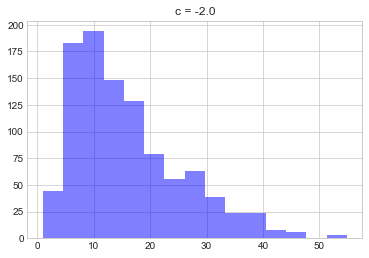

9.683978379712323e-100
-99.0139461888278


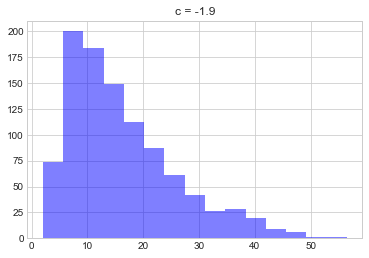

3.147744036603733e-101
-100.50200059016626


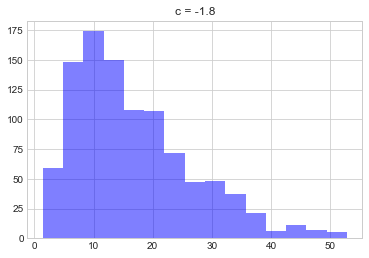

1.3477192666213034e-98
-97.87040056303408


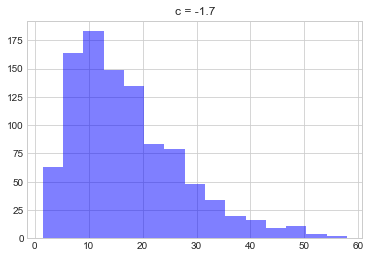

Imonte: []
SINI: []
2.5881890254054883e-98
-97.58700400864758


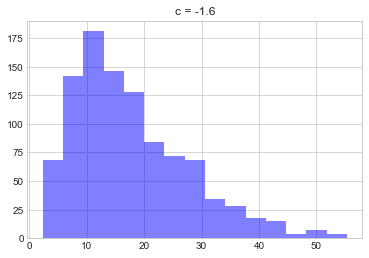

1.2887578671341946e-95
-94.88982867057939


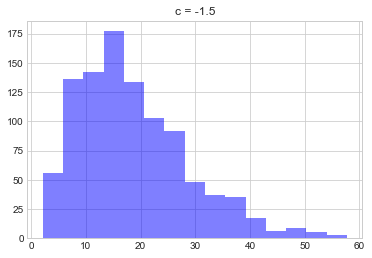

5.801882188229852e-97
-96.23643109413403


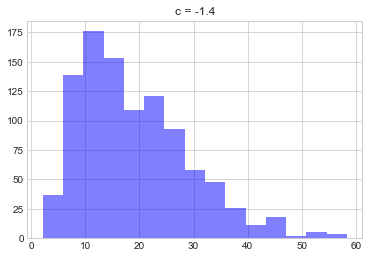

6.819229405987566e-88
-87.1662646991904


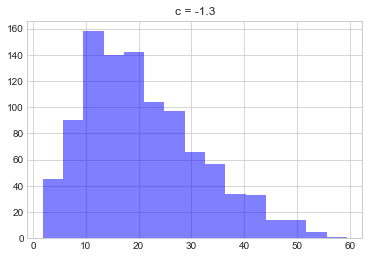

6.367728660987854e-84
-83.19601545085241


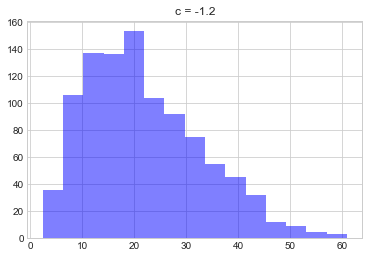

2.341673605633743e-75
-74.630473639217


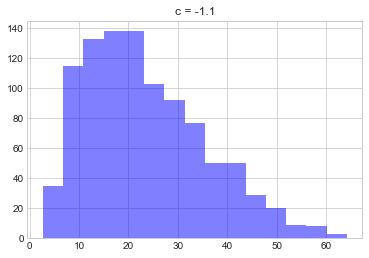

3.849106580885719e-77
-76.41464006322349


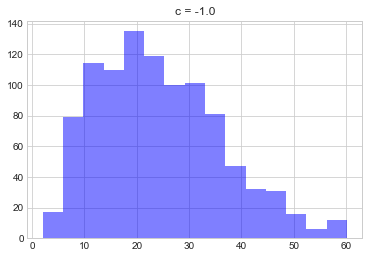

8.766662540867421e-68
-67.05716571061913


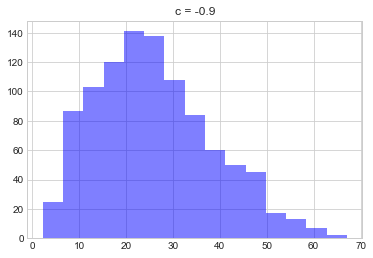

1.1560985357135914e-61
-60.93700514888006


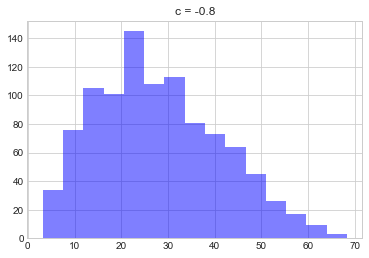

2.2371134819804894e-50
-49.65031198490298


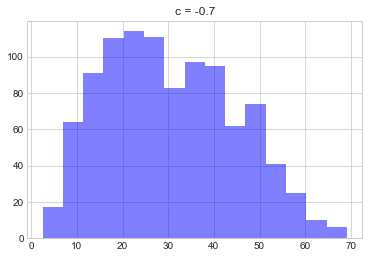

3.718304145702999e-44
-43.42965508917463


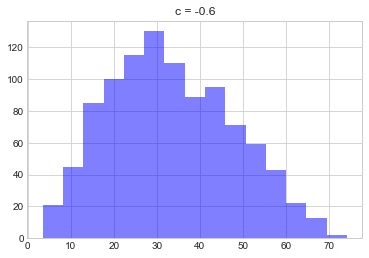

1.8063493179319287e-33
-32.74319826056707


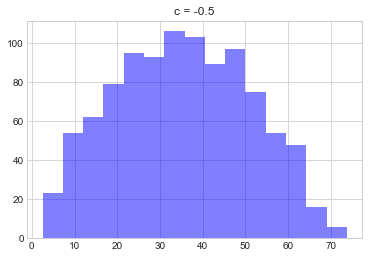

8.543040945250012e-27
-26.068387512137154


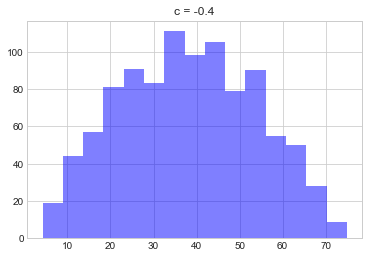

8.772007729311588e-22
-21.056900994322845


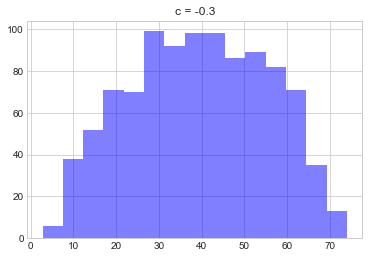

3.6325420946838793e-16
-15.439789344302342


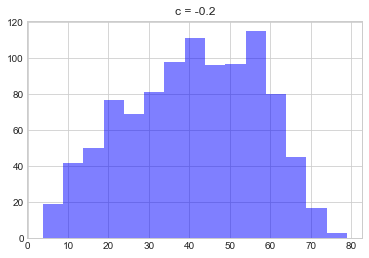

2.7443334053857705e-17
-16.561563127905746


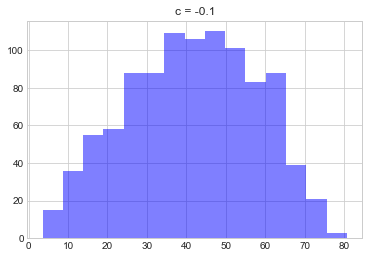

2.257860565180181e-12
-11.646302881561898


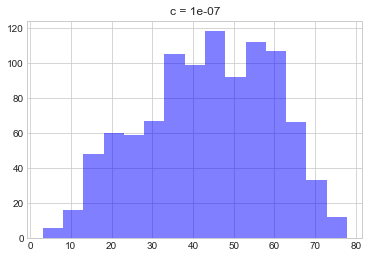

1.3548595578782852e-10
-9.868105720582637


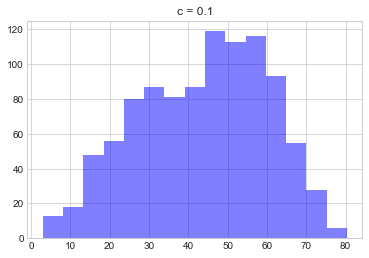

1.2545520178264269e-14
-13.901511326707583


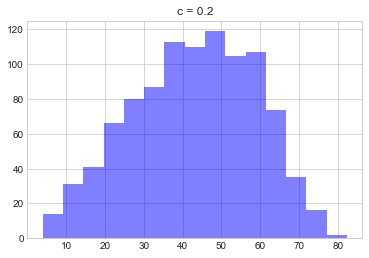

4.784116436340469e-10
-9.320198258985199


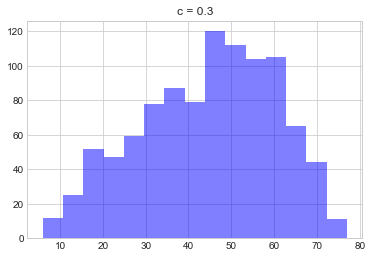

8.777423232686488e-13
-12.056632960184052


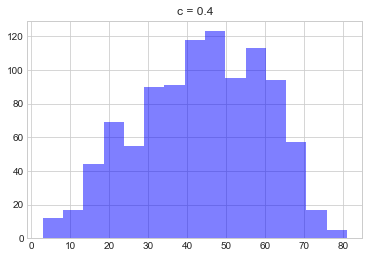

7.037426197342711e-11
-10.152586146635073


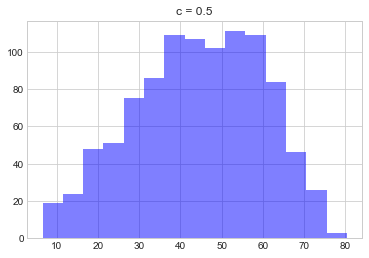

6.894091963971505e-10
-9.16152292760359


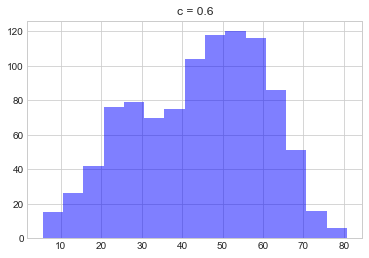

4.0333403283909774e-11
-10.394335131201816


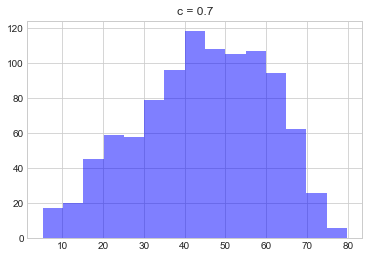

8.101429527229698e-10
-9.09143834149049


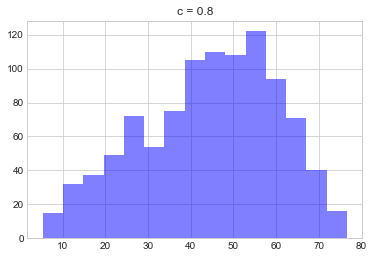

7.285283487590277e-13
-12.137553544140975


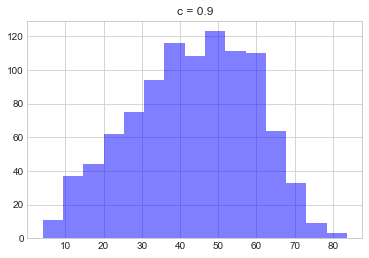

8.914535776227694e-12
-11.04990126775189


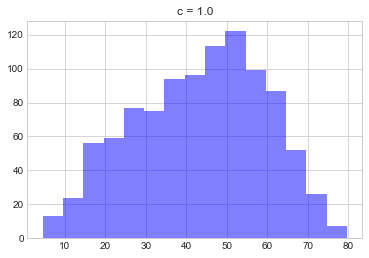

7.826606029937011e-11
-10.106426526833069


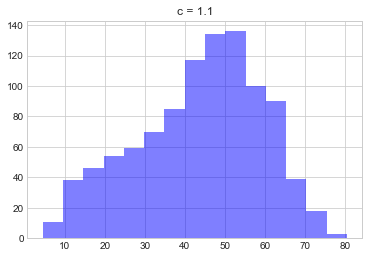

5.012656956182582e-13
-12.29993201554148


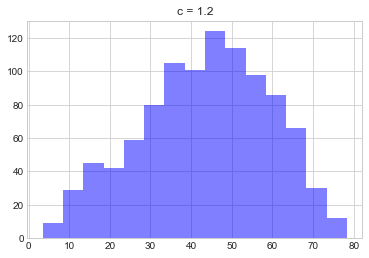

2.0148405166509065e-10
-9.695759324450721


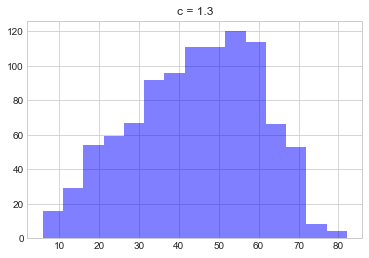

7.662126488838794e-11
-10.11565068282132


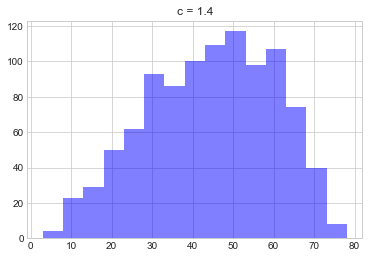

8.914535776227694e-12
-11.04990126775189


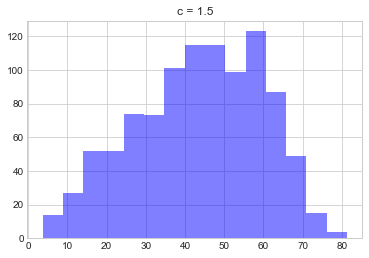

1.971001140077533e-11
-10.705313124513435


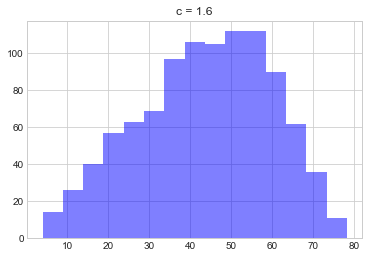

Imonte: []
SINI: []
1.9146146668092e-08
-7.7179186185191035


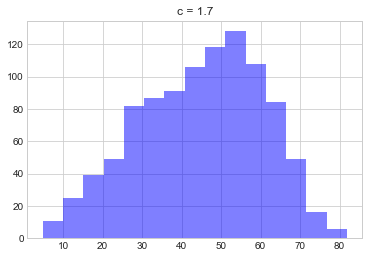

1.973361474227886e-10
-9.704793354746027


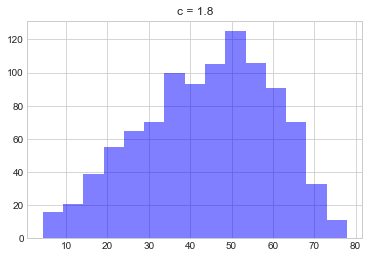

4.331001890456321e-09
-8.363411626703183


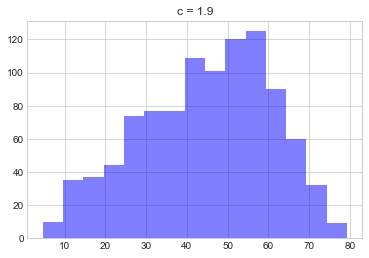

1.4756307287200343e-09
-8.831022309548112


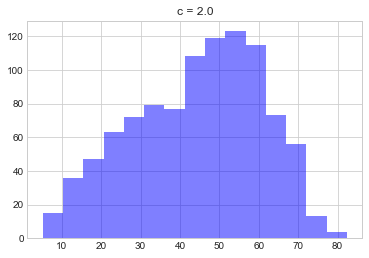

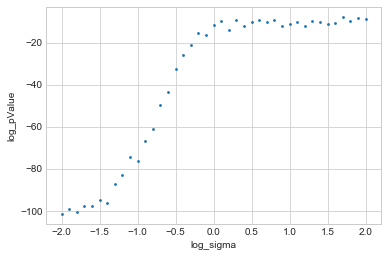

In [10]:
#that'll allow you to create fake pop of biased cosI's
#run it through code to create fake observed population
#compare to real population using KS test
#make grid varying c from -3 to 3 in 0.1 steps and record KS pvalue each time
#make plot of these values v c

#QUESTIONS/VERIFY: do I create a fake population for each value of c
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt
%matplotlib inline
plt.style.use('seaborn-whitegrid')
from sklearn.linear_model import LinearRegression
from mlxtend.plotting import plot_linear_regression
import csv
import pandas
import statistics
import random
import math
from scipy.stats import ks_2samp
from scipy.stats import truncnorm


#generate fake truths
# generate observed values
data = genfromtxt('starsData.csv',delimiter=',',dtype='float')
#cols: vsini, e_vsini, prot, e_prot, radius, e_r
#e_prot of 0 means no error given
rows,cols=data.shape

RSun = 695700

width = int(2)
height = int(41)

grid = np.zeros((height,width))
print('running')
c = -20.0
for i in range(height):
    if c == 0:
        c = 0.000001
    grid[i][0] = c/10
    if c==0.000001:
        c = c-0.000001
    c = c+1

for i in range(height):
    IsummaryMedian = []
    IsummaryMean = []
    ItrueList = []    
    c = grid[i][0]
   # try:
    runMonte(data,c,IsummaryMedian,IsummaryMean,ItrueList)
    with open("trunciList1.txt", 'w') as f:
        for num in IsummaryMedian:
            f.write(str(num)+'\n')

    pValue = KSTest()
    print(pValue)
    log_pValue = math.log10(pValue)
    grid[i][1] = log_pValue
    print(log_pValue)

    for i in range(0,len(ItrueList)):
        ItrueList[i]=math.degrees(ItrueList[i])
    
    #print(ItrueList)
            
   # plt.hist(ItrueList,bins = 15, edgecolor='red', linewidth= 2,histtype = 'step')
    plt.hist(IsummaryMedian, bins = 15,color = 'blue', alpha = 0.5)
    plt.title('c = ' + str(c))
    plt.show()
   # except:
    #    print('error c = '+str(c))
    
    #run entire program for each c value
    #create methods
    #run KS test 
    #add p value to grid
try:
    log_pValues = []
    cValues = []

    for i in range(height):
        cValues.append(grid[i][0])
        log_pValues.append(grid[i][1])

#    for i in range(len(cValues)):
#        cValues[i]=10**(cValues[i])
    with open("trun_cValues1.txt", 'w') as f:
        for num in cValues:
            f.write(str(num)+'\n')
    with open("trunc_log_pValues1.txt", 'w') as f:
        for num in log_pValues:
            f.write(str(num)+'\n')
    plt.scatter(cValues, log_pValues, s=np.pi)
    #plt.plot(p, Y_pred, color='red')
    #plt.errorbar(p, v, yerr=e_v, fmt='.k')
   # plt.ylim(0, 0.1)
    plt.xlabel("log_sigma")
    plt.ylabel("log_pValue")
    plt.show()
except:
    print('error pt 2')


In [5]:
def runMonte(data,c,IsummaryMedian,IsummaryMean,ItrueList):
    for j in range(0,1000):
        cosIList = []
        #Rtrue = np.random.normal(random.choice(data[:,4]),random.choice(data[:,5]))
        #Ptrue = np.random.normal(random.choice(data[:,2]),random.choice(data[:,3]))
        index1 = random.randint(0,224)
        Rtrue = data[index1,4]
        e_Rtrue = data[index1,5]

        index2 = random.randint(0,224)
        Ptrue = data[index2,2]
        e_Ptrue = data[index2,3]
        Vtrue = 2*np.pi*Rtrue*RSun/(Ptrue*24*3600)

        cosI = 99
        while cosI >1:
            x = np.random.normal(1,10**c)
            if x >=0 and x<=1:
                cosI = x
        cosI_random = cosI
#        a = -1.0/(10**c)
#        value = truncnorm.rvs(a,1,1,10**c)
 #       cosI_random = 1.0 - value
#        print(cosI_random)
        #cosI_random = truncnorm.rvs(0,1,0,10**c)
   #     if cosI_random>1:
   #         test = truncnorm.rvs(0,1,0,10**c,1000)
   #         for num in test:
   #             if num<=1:
   #                 cosIList.append(num)
   #         cosI_random = statistics.median(cosIList)

        Itrue = np.arccos(cosI_random)
 
        ItrueList.append(Itrue)

        VSINItrue = Vtrue*np.sin(Itrue)

        e_VSINIobs = random.choice(data[:,1])
        VSINIobs = np.random.normal(VSINItrue,e_VSINIobs)
        Robs = np.random.normal(Rtrue,e_Rtrue)
        e_Robs = e_Rtrue
        Pobs = np.random.normal(Ptrue,e_Ptrue)
        e_Pobs = e_Ptrue

        Pmonte = np.random.normal(Pobs,e_Pobs,10000)
        Rmonte = np.random.normal(Robs,e_Robs,10000)
        VSINImonte = np.random.normal(VSINIobs,e_VSINIobs,10000)

        iSINImonte = VSINImonte/(2*np.pi*Rmonte*RSun/(Pmonte*24*3600))
        SINImonte = []

        #rint(iSINImonte)
        for num in iSINImonte:
            if num>= 0 and num <=1:
                SINImonte.append(num)

        Imonte = np.arcsin(SINImonte)


        for i in range(0,len(Imonte)):
            Imonte[i]=math.degrees(Imonte[i])
       #print(Imonte)
        try:
            IsummaryMedian.append(statistics.median(Imonte))
            IsummaryMean.append(statistics.mean(Imonte))
        except:
            print('Imonte: '+str(Imonte))
            print('SINI: ' + str(SINImonte))
        #print('done')


In [6]:
def KSTest():
    i_all = fileToList('i_all.txt')
    i_modBeta = fileToList('trunciList1.txt')
    result = ks_2samp(i_all,i_modBeta)
    return result.pvalue
    #need to return pvalue


In [7]:
def fileToList(name):
    my_file = open(name, "r")
    content = my_file.read()
    content_list = content.strip().split("\n")
    my_file.close()
    
    for i in range(len(content_list)):
        content_list[i]=float(content_list[i])
    return content_list